In [47]:
import os
import sys

In [48]:
sys.path.append('../lib')

In [49]:
import cov_independence_test
import hsic_independence_test
import gen_processes

In [50]:
from importlib import reload

In [51]:
reload(cov_independence_test);
reload(hsic_independence_test);
reload(gen_processes);

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.ar_model as ar
import torch
torch.set_default_dtype(torch.double)
import sigkernel

In [53]:
import pprint
pp = pprint.PrettyPrinter(indent = 4)

In [54]:
import scipy.stats as stats

In [55]:
from tqdm import tqdm

In [56]:
from itertools import product

In [57]:
import matplotlib.pyplot as plt

In [58]:
BIG_RESULT_MEMORY_PLACE = []

In [59]:
N_TIMESTEPS = 1800
SIG_KERNEL_SAMPLES_NO = 120
M_RUNS = 100
COVS = [0, 0.05, 0.1, 0.2, 0.3, 0.4]
PROC_DIV = 8
RBF_SIGMA = 2

In [60]:
assert N_TIMESTEPS % SIG_KERNEL_SAMPLES_NO == 0, 'Cannot reshape such array properly'

In [61]:
processes = gen_processes.gen_ar_iid_samples_burn_in(N_TIMESTEPS+1, M_RUNS)

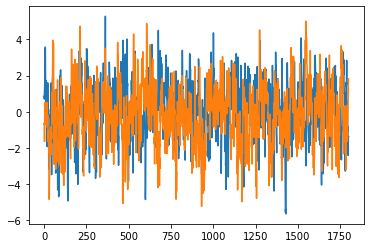

In [62]:
plt.plot(processes[0, :, 0])
plt.plot(processes[0, :, 1]);

In [63]:
def get_bootstrap_samples_lead_lag(X_raw, Y_raw):
    single_sample_length = int(N_TIMESTEPS / SIG_KERNEL_SAMPLES_NO)
        
    x_bootstrap_samples = torch.zeros(SIG_KERNEL_SAMPLES_NO, single_sample_length, 2)
    y_bootstrap_samples = torch.zeros(SIG_KERNEL_SAMPLES_NO, single_sample_length, 2)
    
    rng = np.random.default_rng(1234)
    
    for i in range(SIG_KERNEL_SAMPLES_NO):
        idx_low = rng.integers(0, N_TIMESTEPS - single_sample_length + 1)
        x_bootstrap_samples[i, :, 0] = X_raw[idx_low+1 : idx_low+single_sample_length+1]
        x_bootstrap_samples[i, :, 1] = X_raw[idx_low : idx_low+single_sample_length]
        y_bootstrap_samples[i, :, 0] = Y_raw[idx_low+1 : idx_low+single_sample_length+1]
        y_bootstrap_samples[i, :, 1] = Y_raw[idx_low : idx_low+single_sample_length]

    return x_bootstrap_samples, y_bootstrap_samples

In [64]:
hsic_results = {}
cov_results = {}

In [ ]:
for cov in COVS:#[0, 0.3, 0.8]:    
    processes = gen_processes.gen_ar_iid_samples_burn_in(N_TIMESTEPS+1, M_RUNS, corr=cov)
    hsic_results[cov] = []
    cov_results[cov] = []
    for run in range(M_RUNS):
        X_raw = processes[run, :, 0]
        Y_raw = processes[run, :, 1]
        X_lead_lag_chopped, Y_lead_lag_chopped = get_bootstrap_samples_lead_lag(X_raw, Y_raw)
        
        X = X_raw[:N_TIMESTEPS]
        Y = Y_raw[:N_TIMESTEPS]
        
        hsic_test_result = hsic_independence_test.get_test_result_matrix_shuffle_u_stat(X_lead_lag_chopped/PROC_DIV, Y_lead_lag_chopped/PROC_DIV, static_kernel = sigkernel.RBFKernel(sigma = RBF_SIGMA))
        cov_test_result = cov_independence_test.get_test_result(X, Y)

        print('RUN:', run)
        print('HSIC:', hsic_test_result[1:])
        print('COV:', cov_test_result)

        hsic_results[cov].append(hsic_test_result)
        cov_results[cov].append(cov_test_result)
        
    print('==================== END COV {} ================='.format(cov))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:58<00:00,  4.77s/it]


RUN: 0
HSIC: (-0.0001346742214869412, 0.8)
COV: (tensor(-0.0791), 0.6976861551406668)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:59<00:00,  4.80s/it]


RUN: 1
HSIC: (-4.2255165580762366e-05, 0.42)
COV: (tensor(0.0668), 0.32077175321573415)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:58<00:00,  4.77s/it]


RUN: 2
HSIC: (7.488325160287523e-05, 0.18)
COV: (tensor(0.1725), 0.11536848698730728)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:58<00:00,  4.76s/it]


RUN: 3
HSIC: (-4.880119189598631e-05, 0.6)
COV: (tensor(0.0532), 0.34135204919841977)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:01<00:00,  4.82s/it]


RUN: 4
HSIC: (0.0006952728077211923, 0.0)
COV: (tensor(0.0821), 0.2638897875897199)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:58<00:00,  4.78s/it]


RUN: 5
HSIC: (-0.0001244468229419926, 0.8)
COV: (tensor(0.1743), 0.13025701139720525)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:59<00:00,  4.78s/it]


RUN: 6
HSIC: (0.0004924487877093764, 0.0)
COV: (tensor(0.1094), 0.23342667025114716)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:58<00:00,  4.77s/it]


RUN: 7
HSIC: (-3.666375193667193e-05, 0.32)
COV: (tensor(-0.1160), 0.772447618503433)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:00<00:00,  4.81s/it]


RUN: 8
HSIC: (3.295806761571818e-05, 0.32)
COV: (tensor(-0.1893), 0.9063148986627754)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:58<00:00,  4.78s/it]


RUN: 9
HSIC: (-0.00011267155351890601, 0.76)
COV: (tensor(-0.0277), 0.5776868278182548)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:00<00:00,  4.80s/it]


RUN: 10
HSIC: (8.193960848235093e-05, 0.16)
COV: (tensor(0.1561), 0.08998491510524265)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:20<00:00,  5.21s/it]


RUN: 11
HSIC: (-4.987881865847754e-05, 0.48)
COV: (tensor(0.1397), 0.13709669942812752)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:21<00:00,  5.22s/it]


RUN: 12
HSIC: (-5.058756854126045e-05, 0.5)
COV: (tensor(0.0110), 0.47112964837996973)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:00<00:00,  4.81s/it]


RUN: 13
HSIC: (-5.06255626131491e-06, 0.26)
COV: (tensor(0.0117), 0.46407124013501)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:00<00:00,  4.82s/it]


RUN: 14
HSIC: (0.0001232873009684443, 0.1)
COV: (tensor(0.0907), 0.26418398592737313)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:01<00:00,  4.82s/it]


RUN: 15
HSIC: (-5.0497458954135155e-05, 0.52)
COV: (tensor(0.1878), 0.08202000833054468)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:01<00:00,  4.83s/it]


RUN: 16
HSIC: (0.0006921908040746771, 0.02)
COV: (tensor(0.0023), 0.4932095766846004)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:02<00:00,  4.86s/it]


RUN: 17
HSIC: (-9.337108235540903e-05, 0.52)
COV: (tensor(-0.0051), 0.5161861237752754)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:01<00:00,  4.84s/it]


RUN: 18
HSIC: (-5.215734765551261e-05, 0.64)
COV: (tensor(0.0125), 0.46208890486803)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:09<00:00,  4.99s/it]


RUN: 19
HSIC: (0.00022322757115000869, 0.02)
COV: (tensor(-0.0726), 0.701988795756834)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:23<00:00,  5.26s/it]


RUN: 20
HSIC: (-0.00014293426647871144, 0.88)
COV: (tensor(-0.0850), 0.7225711092704127)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:20<00:00,  5.22s/it]


RUN: 21
HSIC: (-7.104254427670043e-05, 0.74)
COV: (tensor(0.1833), 0.10480912472026249)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:11<00:00,  5.03s/it]


RUN: 22
HSIC: (-2.405998692589506e-05, 0.46)
COV: (tensor(0.0703), 0.3225798926515261)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:21<00:00,  5.24s/it]


RUN: 23
HSIC: (0.0005542315873541259, 0.02)
COV: (tensor(0.0676), 0.3279602226926106)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:09<00:00,  5.00s/it]


RUN: 24
HSIC: (0.0003058286844019875, 0.06)
COV: (tensor(-0.0795), 0.7033603799955442)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:08<00:00,  4.97s/it]


RUN: 25
HSIC: (0.00021258143510305416, 0.12)
COV: (tensor(0.0581), 0.34424389464703253)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:07<00:00,  4.95s/it]


RUN: 26
HSIC: (0.0004972093342259232, 0.02)
COV: (tensor(-0.3182), 0.9864281399363266)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:21<00:00,  5.24s/it]


RUN: 27
HSIC: (0.0007648891023872562, 0.02)
COV: (tensor(-0.0536), 0.6562189948991318)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:13<00:00,  5.08s/it]


RUN: 28
HSIC: (8.15657360719868e-06, 0.26)
COV: (tensor(0.0050), 0.48459835053055533)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:16<00:00,  5.14s/it]


RUN: 29
HSIC: (-0.0001031022350881372, 0.56)
COV: (tensor(0.1109), 0.20905311203657329)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:09<00:00,  4.99s/it]


RUN: 30
HSIC: (-6.563608720666636e-05, 0.5)
COV: (tensor(-0.2169), 0.9453826829636249)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:11<00:00,  5.04s/it]


RUN: 31
HSIC: (-0.00012219589602358027, 0.74)
COV: (tensor(-0.0618), 0.6630394018504764)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:06<00:00,  4.93s/it]


RUN: 32
HSIC: (2.1257180891964822e-05, 0.36)
COV: (tensor(-0.0395), 0.612604295600162)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:07<00:00,  4.95s/it]


RUN: 33
HSIC: (5.5848589277651683e-05, 0.16)
COV: (tensor(0.1224), 0.1839912575990259)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:11<00:00,  5.02s/it]


RUN: 34
HSIC: (4.3459675062029746e-05, 0.24)
COV: (tensor(-0.0476), 0.6656972969411576)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:08<00:00,  4.96s/it]


RUN: 35
HSIC: (-8.740953471253476e-06, 0.32)
COV: (tensor(-0.0393), 0.6010980230326499)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:09<00:00,  4.99s/it]


RUN: 36
HSIC: (0.001182414343797289, 0.0)
COV: (tensor(-0.1161), 0.8092926403084646)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:04<00:00,  4.89s/it]


RUN: 37
HSIC: (-0.00012097603033334181, 0.78)
COV: (tensor(-0.0297), 0.5776528699328235)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:05<00:00,  4.90s/it]


RUN: 38
HSIC: (-3.2294994267267896e-05, 0.48)
COV: (tensor(-0.1391), 0.8678564933035662)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:05<00:00,  4.90s/it]


RUN: 39
HSIC: (-0.00018214937608918014, 1.0)
COV: (tensor(0.0476), 0.37531662485627715)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:19<00:00,  5.19s/it]


RUN: 40
HSIC: (-9.478574809040907e-05, 0.78)
COV: (tensor(-0.0664), 0.6863690779419303)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:08<00:00,  4.97s/it]


RUN: 41
HSIC: (-0.00013614466016442783, 0.78)
COV: (tensor(0.0599), 0.34866081620727774)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:06<00:00,  4.94s/it]


RUN: 42
HSIC: (0.00020147970615158606, 0.14)
COV: (tensor(0.0894), 0.2593608774858359)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:14<00:00,  5.08s/it]


RUN: 43
HSIC: (-8.208928690578432e-06, 0.3)
COV: (tensor(-0.1701), 0.8730908388586036)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:07<00:00,  4.95s/it]


RUN: 44
HSIC: (-0.00013425004748701674, 0.78)
COV: (tensor(0.0666), 0.3340510377523791)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:10<00:00,  5.01s/it]


RUN: 45
HSIC: (0.0004658027551138755, 0.04)
COV: (tensor(-0.0764), 0.7081143794035787)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:05<00:00,  4.90s/it]


RUN: 46
HSIC: (-9.564826364627521e-05, 0.52)
COV: (tensor(-0.1647), 0.8505027479415245)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:06<00:00,  4.93s/it]


RUN: 47
HSIC: (0.0012288070841497412, 0.0)
COV: (tensor(-0.1189), 0.7903306185603334)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:06<00:00,  4.93s/it]


RUN: 48
HSIC: (-1.9484337725472756e-05, 0.46)
COV: (tensor(0.1360), 0.16513017184991163)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:14<00:00,  5.09s/it]


RUN: 49
HSIC: (2.4795447929548686e-05, 0.22)
COV: (tensor(-0.0147), 0.5426889321503345)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:13<00:00,  5.06s/it]


RUN: 50
HSIC: (-1.088163257390029e-05, 0.4)
COV: (tensor(0.0751), 0.28938190882873926)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:31<00:00,  5.43s/it]


RUN: 51
HSIC: (0.00011326888414187053, 0.2)
COV: (tensor(-0.0646), 0.687162460268184)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:29<00:00,  5.39s/it]


RUN: 52
HSIC: (-0.0001359090661678941, 0.86)
COV: (tensor(0.2149), 0.07656433136393914)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:27<00:00,  5.34s/it]


RUN: 53
HSIC: (-0.00013979495396032604, 0.74)
COV: (tensor(-0.2008), 0.9141074151513303)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:28<00:00,  5.37s/it]


RUN: 54
HSIC: (7.884562870308365e-05, 0.26)
COV: (tensor(0.0708), 0.31152175003296867)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:30<00:00,  5.41s/it]


RUN: 55
HSIC: (-2.9269439278944986e-05, 0.32)
COV: (tensor(0.1026), 0.22929353213972692)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:28<00:00,  6.58s/it]


RUN: 56
HSIC: (-0.00011001749623007484, 0.68)
COV: (tensor(-0.0238), 0.5740161381089335)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:32<00:00,  6.65s/it]


RUN: 57
HSIC: (-8.165978165242116e-05, 0.64)
COV: (tensor(-0.0601), 0.6874671738333764)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:31<00:00,  6.64s/it]


RUN: 58
HSIC: (0.00010449344632146307, 0.14)
COV: (tensor(0.1334), 0.15529570952818084)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:46<00:00,  6.93s/it]


RUN: 59
HSIC: (0.00028076997648818214, 0.1)
COV: (tensor(-0.0760), 0.697099772317834)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:10<00:00,  6.20s/it]


RUN: 60
HSIC: (0.0002176868464853765, 0.06)
COV: (tensor(0.2326), 0.035350290446914956)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:04<00:00,  4.89s/it]


RUN: 61
HSIC: (6.63059003793709e-05, 0.12)
COV: (tensor(-0.0385), 0.6286913681659368)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:02<00:00,  4.85s/it]


RUN: 62
HSIC: (-4.4279672897662437e-05, 0.5)
COV: (tensor(-0.1312), 0.8388925512874181)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:02<00:00,  4.85s/it]


RUN: 63
HSIC: (2.1071843493647435e-05, 0.26)
COV: (tensor(0.0314), 0.41362166059727956)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:02<00:00,  4.85s/it]


RUN: 64
HSIC: (0.0003139735999948545, 0.08)
COV: (tensor(-0.0028), 0.5081491203412316)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:02<00:00,  4.84s/it]


RUN: 65
HSIC: (6.513574787359033e-05, 0.24)
COV: (tensor(-0.0053), 0.5145622596089445)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:03<00:00,  4.86s/it]


RUN: 66
HSIC: (-4.649667275424818e-06, 0.34)
COV: (tensor(0.0555), 0.33599765841095164)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:01<00:00,  4.83s/it]


RUN: 67
HSIC: (0.00014284962039479154, 0.1)
COV: (tensor(0.0364), 0.39923175920532605)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:01<00:00,  4.83s/it]


RUN: 68
HSIC: (-3.407321295156862e-05, 0.54)
COV: (tensor(0.0366), 0.40660370099508747)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:02<00:00,  4.84s/it]


RUN: 69
HSIC: (-9.525565595902563e-05, 0.74)
COV: (tensor(0.0526), 0.34175918212181045)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:02<00:00,  4.85s/it]


RUN: 70
HSIC: (0.0004328664424029238, 0.1)
COV: (tensor(0.0593), 0.3400074137991421)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:02<00:00,  4.85s/it]


RUN: 71
HSIC: (5.9566474415850834e-05, 0.24)
COV: (tensor(-0.1919), 0.9287823209836786)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:02<00:00,  4.84s/it]


RUN: 72
HSIC: (5.679302708938572e-05, 0.2)
COV: (tensor(0.1596), 0.14436172392728486)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:02<00:00,  4.84s/it]


RUN: 73
HSIC: (0.0003453306654630506, 0.02)
COV: (tensor(0.1592), 0.09638171203213375)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:02<00:00,  4.84s/it]


RUN: 74
HSIC: (6.156298164805563e-05, 0.2)
COV: (tensor(0.4620), 0.002173642075096849)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:02<00:00,  4.85s/it]


RUN: 75
HSIC: (8.410883115161916e-05, 0.22)
COV: (tensor(0.0187), 0.4507589166434981)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:02<00:00,  4.84s/it]


RUN: 76
HSIC: (8.2093102160119e-05, 0.12)
COV: (tensor(-0.2432), 0.952193291692552)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:02<00:00,  4.84s/it]


RUN: 77
HSIC: (0.00017294181470761671, 0.14)
COV: (tensor(-0.0484), 0.6261710958233483)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:01<00:00,  4.83s/it]


RUN: 78
HSIC: (-0.0001657643039565393, 0.96)
COV: (tensor(-0.0942), 0.749818756432008)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:02<00:00,  4.85s/it]


RUN: 79
HSIC: (-8.107506523891139e-05, 0.74)
COV: (tensor(-0.2446), 0.9513383594965668)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:02<00:00,  4.85s/it]


RUN: 80
HSIC: (0.0005640691271611153, 0.0)
COV: (tensor(-0.1664), 0.8869888686604757)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:02<00:00,  4.85s/it]


RUN: 81
HSIC: (0.00020216355152435916, 0.04)
COV: (tensor(-0.0188), 0.5504384353108749)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:02<00:00,  4.85s/it]


RUN: 82
HSIC: (-8.628618470307714e-05, 0.64)
COV: (tensor(0.0623), 0.3356647126731088)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:01<00:00,  4.84s/it]


RUN: 83
HSIC: (-3.232798800967274e-05, 0.48)
COV: (tensor(0.1237), 0.17471006679732914)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:02<00:00,  4.86s/it]


RUN: 84
HSIC: (-4.69148165624933e-05, 0.48)
COV: (tensor(0.0369), 0.3989445869916274)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:02<00:00,  4.84s/it]


RUN: 85
HSIC: (-8.022030563359372e-05, 0.58)
COV: (tensor(0.0407), 0.3820586306937628)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:02<00:00,  4.86s/it]


RUN: 86
HSIC: (0.0002522682409831223, 0.06)
COV: (tensor(-0.1821), 0.8759155851246676)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:02<00:00,  4.85s/it]


RUN: 87
HSIC: (-6.803943370603527e-05, 0.44)
COV: (tensor(-0.1353), 0.8134648168429243)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:02<00:00,  4.85s/it]


RUN: 88
HSIC: (-0.00015570592688041174, 0.76)
COV: (tensor(-0.0074), 0.5198821753435539)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:02<00:00,  4.85s/it]


RUN: 89
HSIC: (3.848458999233806e-05, 0.34)
COV: (tensor(0.0089), 0.472984139674942)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:34<00:00,  4.29s/it]


RUN: 90
HSIC: (-7.259142735382973e-05, 0.5)
COV: (tensor(0.0718), 0.28946568098983894)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:12<00:00,  3.86s/it]


RUN: 91
HSIC: (2.562764104840909e-05, 0.32)
COV: (tensor(-0.1575), 0.8343036691317849)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.87s/it]


RUN: 92
HSIC: (0.00027391890249894857, 0.02)
COV: (tensor(0.0054), 0.4844307554553914)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.86s/it]


RUN: 93
HSIC: (-3.93976711579036e-05, 0.48)
COV: (tensor(-0.0212), 0.562395502125558)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.87s/it]


RUN: 94
HSIC: (-1.6089218293213747e-06, 0.32)
COV: (tensor(0.2773), 0.017752884626762833)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:12<00:00,  3.86s/it]


RUN: 95
HSIC: (-9.691405730816172e-05, 0.64)
COV: (tensor(0.0592), 0.34019857032861023)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.87s/it]


RUN: 96
HSIC: (-3.423007781910847e-05, 0.42)
COV: (tensor(-0.0922), 0.7715939569092072)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:12<00:00,  3.85s/it]


RUN: 97
HSIC: (0.00044586532255030953, 0.02)
COV: (tensor(0.1362), 0.16726069275058864)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:12<00:00,  3.85s/it]


RUN: 98
HSIC: (0.00011485542366096446, 0.16)
COV: (tensor(-0.1843), 0.9188383546086816)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.87s/it]


RUN: 99
HSIC: (0.00012060573787064932, 0.22)
COV: (tensor(0.1027), 0.22699523560245272)
==================== END COV 0 =================


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:12<00:00,  3.86s/it]


RUN: 0
HSIC: (-3.491507925068582e-05, 0.54)
COV: (tensor(0.1939), 0.05023491640506805)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.86s/it]


RUN: 1
HSIC: (-1.4165821056399963e-05, 0.36)
COV: (tensor(-0.1014), 0.7602750584317237)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:12<00:00,  3.86s/it]


RUN: 2
HSIC: (-7.353840627222219e-05, 0.64)
COV: (tensor(0.1924), 0.06227710169781697)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.88s/it]


RUN: 3
HSIC: (0.0005882529425986771, 0.02)
COV: (tensor(0.5550), 0.0001012656895573727)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.86s/it]


RUN: 4
HSIC: (0.0001855560606949247, 0.1)
COV: (tensor(0.0295), 0.4240833077299806)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.86s/it]


RUN: 5
HSIC: (-3.559750006432161e-05, 0.34)
COV: (tensor(0.2774), 0.031855591046694554)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:12<00:00,  3.86s/it]


RUN: 6
HSIC: (0.0003197902817893006, 0.06)
COV: (tensor(0.1289), 0.16697482886701875)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.86s/it]


RUN: 7
HSIC: (0.00019730572142284686, 0.12)
COV: (tensor(-0.1856), 0.9087095189856351)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:12<00:00,  3.86s/it]


RUN: 8
HSIC: (5.9825800657886674e-05, 0.18)
COV: (tensor(-0.0633), 0.6949916337951355)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.87s/it]


RUN: 9
HSIC: (0.0005624030683724079, 0.02)
COV: (tensor(-0.0693), 0.710016325985596)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.87s/it]


RUN: 10
HSIC: (4.230244765168756e-05, 0.32)
COV: (tensor(0.0699), 0.30888350807028975)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.86s/it]


RUN: 11
HSIC: (-6.296167250385842e-05, 0.54)
COV: (tensor(0.0697), 0.3214727357848498)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.87s/it]


RUN: 12
HSIC: (-2.589674810660192e-05, 0.36)
COV: (tensor(0.1000), 0.22859590279450281)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.87s/it]


RUN: 13
HSIC: (-6.547215617058733e-05, 0.7)
COV: (tensor(0.1693), 0.0779406877339921)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:12<00:00,  3.86s/it]


RUN: 14
HSIC: (0.00032307079100224456, 0.04)
COV: (tensor(0.1577), 0.11912447374036195)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.87s/it]


RUN: 15
HSIC: (0.00016324309262838455, 0.18)
COV: (tensor(0.0286), 0.41934786506645405)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:12<00:00,  3.85s/it]


RUN: 16
HSIC: (0.00023232288823993308, 0.1)
COV: (tensor(0.1911), 0.0720279859509787)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.86s/it]


RUN: 17
HSIC: (-0.0001374695888123334, 0.7)
COV: (tensor(0.0818), 0.2678976412402797)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:12<00:00,  3.86s/it]


RUN: 18
HSIC: (0.00016326510919406623, 0.14)
COV: (tensor(0.1340), 0.16888440909935776)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:12<00:00,  3.86s/it]


RUN: 19
HSIC: (-4.530399229762949e-06, 0.42)
COV: (tensor(0.1785), 0.08820368909250953)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.87s/it]


RUN: 20
HSIC: (-5.110124435314667e-05, 0.56)
COV: (tensor(0.3266), 0.016667448655757533)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:12<00:00,  3.86s/it]


RUN: 21
HSIC: (5.258137787489403e-05, 0.14)
COV: (tensor(0.2923), 0.017511332939175728)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.86s/it]


RUN: 22
HSIC: (0.0003336693487889786, 0.04)
COV: (tensor(0.0857), 0.2646695245691143)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:12<00:00,  3.86s/it]


RUN: 23
HSIC: (5.1410063022006014e-05, 0.24)
COV: (tensor(0.3345), 0.004621203878574787)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.87s/it]


RUN: 24
HSIC: (-1.764625693567723e-06, 0.48)
COV: (tensor(-0.0669), 0.6553589943119279)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:12<00:00,  3.85s/it]


RUN: 25
HSIC: (-2.9031329439987985e-05, 0.38)
COV: (tensor(0.1174), 0.18389439078495373)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:12<00:00,  3.86s/it]


RUN: 26
HSIC: (0.00010570160872780399, 0.18)
COV: (tensor(-0.1257), 0.8049880315584153)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:14<00:00,  3.88s/it]


RUN: 27
HSIC: (6.634653601955698e-05, 0.32)
COV: (tensor(0.3547), 0.0030499546701417968)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.86s/it]


RUN: 28
HSIC: (3.6246881662815866e-05, 0.26)
COV: (tensor(0.0756), 0.2750854690913819)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.86s/it]


RUN: 29
HSIC: (0.000775314388612891, 0.0)
COV: (tensor(-0.0012), 0.5029391609365469)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:12<00:00,  3.85s/it]


RUN: 30
HSIC: (-3.0529650688837506e-05, 0.36)
COV: (tensor(-0.0480), 0.6506766037181242)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.86s/it]


RUN: 31
HSIC: (0.0002800629966788204, 0.04)
COV: (tensor(0.2848), 0.017320906518104362)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.87s/it]


RUN: 32
HSIC: (6.518933605303978e-05, 0.26)
COV: (tensor(0.1304), 0.20437574903101063)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:12<00:00,  3.85s/it]


RUN: 33
HSIC: (-8.335684125571063e-05, 0.7)
COV: (tensor(0.1356), 0.13467258067795673)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.87s/it]


RUN: 34
HSIC: (0.00013637850452208333, 0.16)
COV: (tensor(0.1317), 0.14306131328875116)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:12<00:00,  3.86s/it]


RUN: 35
HSIC: (-2.9846436266911525e-05, 0.58)
COV: (tensor(0.1249), 0.14134122965397733)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:12<00:00,  3.86s/it]


RUN: 36
HSIC: (-9.377450269165699e-05, 0.48)
COV: (tensor(0.0241), 0.4377295934108594)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.86s/it]


RUN: 37
HSIC: (0.00022548383265807992, 0.08)
COV: (tensor(0.1870), 0.08501945370414687)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:12<00:00,  3.86s/it]


RUN: 38
HSIC: (0.0001714258937854929, 0.14)
COV: (tensor(0.3306), 0.004739383698847188)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.86s/it]


RUN: 39
HSIC: (-1.8395774394441844e-05, 0.44)
COV: (tensor(0.2495), 0.03571072852399859)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:12<00:00,  3.85s/it]


RUN: 40
HSIC: (9.276360737664469e-05, 0.12)
COV: (tensor(0.1935), 0.08826055376499031)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.86s/it]


RUN: 41
HSIC: (-7.064313765203778e-05, 0.82)
COV: (tensor(0.1626), 0.12232837238698879)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.87s/it]


RUN: 42
HSIC: (0.0002900634753044695, 0.0)
COV: (tensor(0.1924), 0.08145749086548149)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.87s/it]


RUN: 43
HSIC: (5.163234648342119e-05, 0.34)
COV: (tensor(0.0803), 0.2933773537753679)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:14<00:00,  3.89s/it]


RUN: 44
HSIC: (0.0019270006642120308, 0.0)
COV: (tensor(0.2266), 0.0371965488776258)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:12<00:00,  3.86s/it]


RUN: 45
HSIC: (-0.00010418649189802842, 0.66)
COV: (tensor(-0.0155), 0.5450047703123627)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.86s/it]


RUN: 46
HSIC: (9.07282421005462e-05, 0.24)
COV: (tensor(0.1711), 0.10041815695940182)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:12<00:00,  3.86s/it]


RUN: 47
HSIC: (0.00032093565054225337, 0.06)
COV: (tensor(0.2329), 0.04509726518131596)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.87s/it]


RUN: 48
HSIC: (0.0008675893443557126, 0.0)
COV: (tensor(-0.2067), 0.9342970089229803)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:12<00:00,  3.86s/it]


RUN: 49
HSIC: (4.125229615881132e-05, 0.28)
COV: (tensor(0.0840), 0.28531438916053864)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:12<00:00,  3.85s/it]


RUN: 50
HSIC: (5.160707850748736e-05, 0.26)
COV: (tensor(0.0060), 0.4843448862638021)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:12<00:00,  3.85s/it]


RUN: 51
HSIC: (-3.789354397643052e-05, 0.4)
COV: (tensor(0.2482), 0.042263309113654834)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.87s/it]


RUN: 52
HSIC: (-6.68984165976827e-05, 0.78)
COV: (tensor(0.0724), 0.30513414672349815)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.88s/it]


RUN: 53
HSIC: (0.0002532739321763344, 0.12)
COV: (tensor(0.1531), 0.1136464103023429)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.87s/it]


RUN: 54
HSIC: (-1.5561316428769345e-05, 0.44)
COV: (tensor(0.0332), 0.4058314195802184)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.86s/it]


RUN: 55
HSIC: (0.00026445264896346465, 0.08)
COV: (tensor(0.1118), 0.19277090134243113)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.86s/it]


RUN: 56
HSIC: (-5.471091182829291e-05, 0.64)
COV: (tensor(0.2034), 0.055415172747101615)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.87s/it]


RUN: 57
HSIC: (0.00022987589159262356, 0.12)
COV: (tensor(0.2630), 0.039921341684315936)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.87s/it]


RUN: 58
HSIC: (0.0010162322771787302, 0.0)
COV: (tensor(0.0083), 0.4747481732794995)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.87s/it]


RUN: 59
HSIC: (-0.00015189337244181367, 0.98)
COV: (tensor(-0.0355), 0.6018655423673414)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.87s/it]


RUN: 60
HSIC: (0.00012059405834397019, 0.14)
COV: (tensor(0.3035), 0.010127130438041254)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:14<00:00,  3.88s/it]


RUN: 61
HSIC: (6.947709822591186e-05, 0.26)
COV: (tensor(0.0994), 0.2281284539706413)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.87s/it]


RUN: 62
HSIC: (-5.104616156748065e-05, 0.46)
COV: (tensor(0.0429), 0.39877998428076855)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.87s/it]


RUN: 63
HSIC: (-0.00010891154393033453, 0.78)
COV: (tensor(0.1375), 0.155471686584286)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.86s/it]


RUN: 64
HSIC: (1.606096733319795e-05, 0.26)
COV: (tensor(0.0888), 0.2451534289500703)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.86s/it]


RUN: 65
HSIC: (-0.00016262502576291915, 0.9)
COV: (tensor(0.2665), 0.05328388280094232)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.88s/it]


RUN: 66
HSIC: (0.0011607292818118786, 0.0)
COV: (tensor(0.4802), 9.006652250076463e-05)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.86s/it]


RUN: 67
HSIC: (0.0014615404320965641, 0.0)
COV: (tensor(0.3034), 0.008975200467152056)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.87s/it]


RUN: 68
HSIC: (5.7589705323879414e-05, 0.22)
COV: (tensor(0.0163), 0.4480990283951891)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.87s/it]


RUN: 69
HSIC: (0.0003541125879060747, 0.04)
COV: (tensor(0.1245), 0.21540952282408266)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.87s/it]


RUN: 70
HSIC: (0.00029811661724643557, 0.06)
COV: (tensor(0.4166), 0.0021651406493486958)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.87s/it]


RUN: 71
HSIC: (-4.898628994598475e-05, 0.48)
COV: (tensor(-0.1337), 0.8354291358273944)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.87s/it]


RUN: 72
HSIC: (0.0001699809684136966, 0.08)
COV: (tensor(0.1171), 0.18851162031035995)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:12<00:00,  3.86s/it]


RUN: 73
HSIC: (-9.041243043261815e-05, 0.68)
COV: (tensor(0.1524), 0.14413868478960667)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.86s/it]


RUN: 74
HSIC: (-0.00010766178231391699, 0.64)
COV: (tensor(-0.0358), 0.5985400664178142)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:12<00:00,  3.85s/it]


RUN: 75
HSIC: (0.000106437583376362, 0.22)
COV: (tensor(-0.0553), 0.653640674138457)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.87s/it]


RUN: 76
HSIC: (-1.4273575894785395e-05, 0.48)
COV: (tensor(-0.0463), 0.6124925089760562)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.88s/it]


RUN: 77
HSIC: (0.00039323194302021136, 0.06)
COV: (tensor(0.2806), 0.010833569010914923)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.87s/it]


RUN: 78
HSIC: (0.0001300615961585816, 0.12)
COV: (tensor(0.3239), 0.005384908775942887)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:12<00:00,  3.86s/it]


RUN: 79
HSIC: (7.043296347686301e-05, 0.18)
COV: (tensor(0.0997), 0.22173248788816113)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:12<00:00,  3.85s/it]


RUN: 80
HSIC: (0.0004977576221472102, 0.0)
COV: (tensor(0.0007), 0.4978881350771691)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:12<00:00,  3.86s/it]


RUN: 81
HSIC: (0.0004919897603214984, 0.0)
COV: (tensor(0.3942), 0.00035871507232587696)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.86s/it]


RUN: 82
HSIC: (0.0004820210865523755, 0.02)
COV: (tensor(0.3503), 0.0023025876046083305)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.86s/it]


RUN: 83
HSIC: (0.00011383324099600856, 0.18)
COV: (tensor(0.0364), 0.3852028577017027)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.86s/it]


RUN: 84
HSIC: (-7.45154208559029e-05, 0.46)
COV: (tensor(0.2326), 0.03510513761913736)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:12<00:00,  3.85s/it]


RUN: 85
HSIC: (-7.186228530242644e-06, 0.4)
COV: (tensor(-0.1669), 0.8885874895472685)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.88s/it]


RUN: 86
HSIC: (-2.8157026987996048e-05, 0.36)
COV: (tensor(0.2621), 0.031484024926590415)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:12<00:00,  3.86s/it]


RUN: 87
HSIC: (0.0006457638160348722, 0.0)
COV: (tensor(0.3234), 0.00901165112295077)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.86s/it]


RUN: 88
HSIC: (7.340093220564725e-05, 0.16)
COV: (tensor(0.1435), 0.1320280638329271)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.86s/it]


RUN: 89
HSIC: (-5.5510996099794596e-05, 0.46)
COV: (tensor(0.0065), 0.48123196787770894)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.87s/it]


RUN: 90
HSIC: (-0.00012170009241474489, 0.92)
COV: (tensor(0.1672), 0.1047331711800823)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.87s/it]


RUN: 91
HSIC: (-5.869208323971975e-05, 0.56)
COV: (tensor(0.2425), 0.057707454584494)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.87s/it]


RUN: 92
HSIC: (-0.00011684807704503974, 0.88)
COV: (tensor(0.1877), 0.07790035015214847)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:12<00:00,  3.86s/it]


RUN: 93
HSIC: (-9.497626221866007e-05, 0.6)
COV: (tensor(0.1325), 0.15173779392927433)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:15<00:00,  3.90s/it]


RUN: 94
HSIC: (0.0005365773242567151, 0.1)
COV: (tensor(0.1461), 0.14795861087463602)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.87s/it]


RUN: 95
HSIC: (-5.4940849724571805e-05, 0.46)
COV: (tensor(0.3504), 0.007632034784493924)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.87s/it]


RUN: 96
HSIC: (-0.00017595879861986852, 0.8)
COV: (tensor(-0.0691), 0.6788035472534504)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.87s/it]


RUN: 97
HSIC: (0.00037966984622683775, 0.1)
COV: (tensor(0.1819), 0.10659585782808345)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.87s/it]


RUN: 98
HSIC: (0.0006248287739265557, 0.02)
COV: (tensor(0.3222), 0.006112363906732199)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:12<00:00,  3.86s/it]


RUN: 99
HSIC: (0.0007968792619201803, 0.02)
COV: (tensor(0.0450), 0.3827142204569527)
==================== END COV 0.05 =================


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.86s/it]


RUN: 0
HSIC: (-0.0001596112968267338, 0.96)
COV: (tensor(0.1946), 0.09143777745253556)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:14<00:00,  3.88s/it]


RUN: 1
HSIC: (8.003034089210104e-06, 0.38)
COV: (tensor(0.0708), 0.29526817029962216)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:12<00:00,  3.86s/it]


RUN: 2
HSIC: (-2.814045276022803e-05, 0.44)
COV: (tensor(0.2777), 0.01723596844098496)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:12<00:00,  3.86s/it]


RUN: 3
HSIC: (0.0001658040587599885, 0.24)
COV: (tensor(0.2096), 0.08270785878221187)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.86s/it]


RUN: 4
HSIC: (-0.00010553444180949612, 0.62)
COV: (tensor(0.0614), 0.31784628599518927)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.86s/it]


RUN: 5
HSIC: (0.00014116200474290075, 0.08)
COV: (tensor(0.1169), 0.18537393441694772)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:12<00:00,  3.86s/it]


RUN: 6
HSIC: (2.8571395921828113e-05, 0.2)
COV: (tensor(0.3008), 0.004145639181035721)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.87s/it]


RUN: 7
HSIC: (-9.476672720420964e-05, 0.74)
COV: (tensor(0.3243), 0.008346891578421167)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.87s/it]


RUN: 8
HSIC: (1.4011427749816008e-05, 0.4)
COV: (tensor(0.1320), 0.14151725807932736)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.87s/it]


RUN: 9
HSIC: (0.000419120875560397, 0.1)
COV: (tensor(0.3658), 0.01366407455619767)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.86s/it]


RUN: 10
HSIC: (0.00012164732079456009, 0.16)
COV: (tensor(0.3542), 0.0017331833688731813)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:14<00:00,  3.89s/it]


RUN: 11
HSIC: (0.0012437478908560173, 0.0)
COV: (tensor(0.6612), 2.326534871643915e-06)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.87s/it]


RUN: 12
HSIC: (0.00021134393086086334, 0.1)
COV: (tensor(0.1875), 0.07533059569097555)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.87s/it]


RUN: 13
HSIC: (0.0010239673588638976, 0.0)
COV: (tensor(0.4133), 0.0011172790699026658)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.88s/it]


RUN: 14
HSIC: (8.545628931155846e-07, 0.44)
COV: (tensor(0.2622), 0.030956689766397094)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.87s/it]


RUN: 15
HSIC: (0.00034279048791407973, 0.1)
COV: (tensor(0.2279), 0.05011392384361513)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.86s/it]


RUN: 16
HSIC: (7.003856742082704e-05, 0.26)
COV: (tensor(0.0684), 0.31752089129228134)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.86s/it]


RUN: 17
HSIC: (-2.2939921709097533e-05, 0.44)
COV: (tensor(0.1863), 0.07595424957735708)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:18<00:00,  3.97s/it]


RUN: 18
HSIC: (-4.1731823485546826e-05, 0.48)
COV: (tensor(0.1817), 0.09749148581158495)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:29<00:00,  4.18s/it]


RUN: 19
HSIC: (-6.758271445694852e-05, 0.5)
COV: (tensor(0.1786), 0.16523766363881076)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:14<00:00,  3.89s/it]


RUN: 20
HSIC: (-0.00011694756835001208, 0.7)
COV: (tensor(0.2826), 0.031524034655061706)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:15<00:00,  3.91s/it]


RUN: 21
HSIC: (0.00014324054267889075, 0.1)
COV: (tensor(0.4624), 0.000219701759390456)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.87s/it]


RUN: 22
HSIC: (0.0007513834975816369, 0.0)
COV: (tensor(0.3159), 0.009727443292842475)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.87s/it]


RUN: 23
HSIC: (7.762739414163278e-06, 0.24)
COV: (tensor(0.5242), 0.00010112610630919061)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:14<00:00,  3.88s/it]


RUN: 24
HSIC: (-0.00014717956018506229, 0.98)
COV: (tensor(-0.0748), 0.7215547534905151)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:14<00:00,  3.89s/it]


RUN: 25
HSIC: (0.0007243952906401674, 0.0)
COV: (tensor(0.4454), 0.002907156188951654)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:13<00:00,  3.87s/it]


RUN: 26
HSIC: (0.00018602011381818606, 0.12)
COV: (tensor(0.1612), 0.11013007683738985)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:20<00:00,  4.01s/it]


RUN: 27
HSIC: (4.54158842129182e-05, 0.24)
COV: (tensor(0.5005), 0.00014737271962816934)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:15<00:00,  3.90s/it]


RUN: 28
HSIC: (3.969437538176024e-05, 0.42)
COV: (tensor(0.3488), 0.004476871269583627)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:14<00:00,  3.90s/it]


RUN: 29
HSIC: (0.00016949112917563625, 0.16)
COV: (tensor(0.3252), 0.012499699488457305)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:14<00:00,  3.89s/it]


RUN: 30
HSIC: (0.0005063952945045802, 0.04)
COV: (tensor(0.0621), 0.34158362190017144)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:16<00:00,  3.93s/it]


RUN: 31
HSIC: (-6.892897964849709e-06, 0.36)
COV: (tensor(0.4021), 0.0015348020092186276)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:32<00:00,  4.24s/it]


RUN: 32
HSIC: (0.0011063433540623446, 0.0)
COV: (tensor(0.1978), 0.06966775131729708)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:41<00:00,  5.64s/it]


RUN: 33
HSIC: (0.00024073430965843023, 0.08)
COV: (tensor(0.3252), 0.006831360127099173)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:40<00:00,  5.62s/it]


RUN: 34
HSIC: (0.0007959883324788475, 0.02)
COV: (tensor(0.2943), 0.02204512175629869)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:40<00:00,  5.61s/it]


RUN: 35
HSIC: (-4.998289993340954e-05, 0.6)
COV: (tensor(0.0273), 0.4187950484742504)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:37<00:00,  5.55s/it]


RUN: 36
HSIC: (0.0016764232009554014, 0.0)
COV: (tensor(0.5149), 0.00024955488723898966)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:56<00:00,  4.73s/it]


RUN: 37
HSIC: (9.820765339774162e-05, 0.14)
COV: (tensor(0.3845), 0.0011793125235780577)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:07<00:00,  4.95s/it]


RUN: 38
HSIC: (0.0006335389927376589, 0.0)
COV: (tensor(0.2728), 0.020958515364357444)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:28<00:00,  5.37s/it]


RUN: 39
HSIC: (-6.746722461414834e-05, 0.64)
COV: (tensor(0.4422), 0.0005512203841879781)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:51<00:00,  5.84s/it]


RUN: 40
HSIC: (6.236341151732994e-05, 0.16)
COV: (tensor(0.5419), 6.9670016323852835e-06)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:16<00:00,  5.13s/it]


RUN: 41
HSIC: (0.0001043077123321634, 0.26)
COV: (tensor(0.3850), 0.0034190767075649164)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:59<00:00,  5.98s/it]


RUN: 42
HSIC: (0.00012172449378611283, 0.06)
COV: (tensor(0.2084), 0.07489423773779169)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:58<00:00,  5.96s/it]


RUN: 43
HSIC: (0.0018782844629132711, 0.0)
COV: (tensor(0.5435), 3.6347499985045495e-05)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:05<00:00,  6.11s/it]


RUN: 44
HSIC: (0.00038954365907195587, 0.04)
COV: (tensor(0.2319), 0.026400209620768722)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:53<00:00,  5.87s/it]


RUN: 45
HSIC: (-9.96495227794103e-05, 0.6)
COV: (tensor(0.1864), 0.09955694497518652)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:53<00:00,  5.86s/it]


RUN: 46
HSIC: (2.8693664777534877e-05, 0.32)
COV: (tensor(0.3808), 0.004927050663134369)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:39<00:00,  5.58s/it]


RUN: 47
HSIC: (-0.00011017301374960375, 0.8)
COV: (tensor(0.2905), 0.017225228594437536)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:47<00:00,  5.75s/it]


RUN: 48
HSIC: (0.00010055249800222654, 0.18)
COV: (tensor(-0.0098), 0.5287598623721285)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:39<00:00,  5.59s/it]


RUN: 49
HSIC: (-9.154822812562635e-05, 0.72)
COV: (tensor(0.2812), 0.019361148709161613)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:11<00:00,  5.03s/it]


RUN: 50
HSIC: (0.00020589711529783727, 0.12)
COV: (tensor(0.1243), 0.17960926234620267)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:55<00:00,  4.71s/it]


RUN: 51
HSIC: (-0.00011447937331610092, 0.54)
COV: (tensor(0.3061), 0.014096031178245094)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:45<00:00,  4.51s/it]


RUN: 52
HSIC: (0.00046037383065611337, 0.02)
COV: (tensor(0.3488), 0.007055043191005361)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:52<00:00,  4.66s/it]


RUN: 53
HSIC: (0.00018215764134454915, 0.14)
COV: (tensor(0.4317), 0.00022188004901324554)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:51<00:00,  4.63s/it]


RUN: 54
HSIC: (-6.928710824616324e-05, 0.6)
COV: (tensor(0.5412), 0.00037416649317556505)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:38<00:00,  4.37s/it]


RUN: 55
HSIC: (0.0005348459850627041, 0.02)
COV: (tensor(0.3590), 0.0018175098739255935)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:41<00:00,  4.43s/it]


RUN: 56
HSIC: (-5.983495034955766e-05, 0.5)
COV: (tensor(0.0905), 0.23691426270126748)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:08<00:00,  4.96s/it]


RUN: 57
HSIC: (-1.536895610776412e-07, 0.36)
COV: (tensor(0.3915), 0.0038781321540533042)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:04<00:00,  4.89s/it]


RUN: 58
HSIC: (0.000270145310403036, 0.08)
COV: (tensor(0.0694), 0.30434484496127134)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:54<00:00,  4.70s/it]


RUN: 59
HSIC: (0.0004976011390367407, 0.0)
COV: (tensor(0.0211), 0.44307166371524087)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:19<00:00,  5.20s/it]


RUN: 60
HSIC: (0.0001972940267314094, 0.1)
COV: (tensor(0.3170), 0.011196144420340337)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:05<00:00,  4.91s/it]


RUN: 61
HSIC: (0.00028355068919050375, 0.06)
COV: (tensor(0.2414), 0.03689553473441498)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:57<00:00,  4.75s/it]


RUN: 62
HSIC: (-0.000111199167355025, 0.62)
COV: (tensor(0.1541), 0.11752144043334845)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:06<00:00,  4.93s/it]


RUN: 63
HSIC: (-2.157801653868141e-05, 0.34)
COV: (tensor(0.3173), 0.008946321135177016)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:23<00:00,  5.27s/it]


RUN: 64
HSIC: (3.7985374493398893e-05, 0.24)
COV: (tensor(0.4316), 0.0015608277789509462)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:03<00:00,  4.87s/it]


RUN: 65
HSIC: (-8.306502501009838e-05, 0.64)
COV: (tensor(0.1330), 0.20163197894009444)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:16<00:00,  5.12s/it]


RUN: 66
HSIC: (2.475673461876937e-05, 0.34)
COV: (tensor(0.2769), 0.033160771167038416)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:18<00:00,  5.17s/it]


RUN: 67
HSIC: (1.621329696477325e-05, 0.34)
COV: (tensor(0.3037), 0.014112934654260334)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:20<00:00,  5.21s/it]


RUN: 68
HSIC: (-0.00010748514180503044, 0.84)
COV: (tensor(-0.0624), 0.6986901878290581)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:56<00:00,  4.73s/it]


RUN: 69
HSIC: (-5.5266546555188256e-05, 0.54)
COV: (tensor(0.5643), 0.0002046616782057642)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:31<00:00,  4.23s/it]


RUN: 70
HSIC: (0.0010628279359972126, 0.0)
COV: (tensor(0.4512), 0.00040541485265177535)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:32<00:00,  4.25s/it]


RUN: 71
HSIC: (0.00041142364464485937, 0.1)
COV: (tensor(0.2548), 0.02212841365163165)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:30<00:00,  4.22s/it]


RUN: 72
HSIC: (-9.87402014376304e-05, 0.72)
COV: (tensor(0.2846), 0.010537663282009668)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:31<00:00,  4.23s/it]


RUN: 73
HSIC: (-2.6935521759918757e-05, 0.44)
COV: (tensor(0.1862), 0.08646724941453465)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:30<00:00,  4.21s/it]


RUN: 74
HSIC: (0.00014535864276665755, 0.14)
COV: (tensor(-0.0658), 0.6817672566311997)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:31<00:00,  4.22s/it]


RUN: 75
HSIC: (0.0006553179577120094, 0.0)
COV: (tensor(0.3062), 0.017030960286812835)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:30<00:00,  4.21s/it]


RUN: 76
HSIC: (0.0006436676009027309, 0.02)
COV: (tensor(0.2719), 0.026781189848661846)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:30<00:00,  4.21s/it]


RUN: 77
HSIC: (0.0003165800008551045, 0.1)
COV: (tensor(0.6685), 9.132340159978547e-06)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:50<00:00,  4.61s/it]


RUN: 78
HSIC: (-0.00016233322007730422, 0.94)
COV: (tensor(0.3425), 0.01073948455721696)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:49<00:00,  4.60s/it]


RUN: 79
HSIC: (-0.00012256967220602988, 0.84)
COV: (tensor(0.3054), 0.00905824198443228)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:36<00:00,  4.32s/it]


RUN: 80
HSIC: (-0.00016731808716774488, 0.86)
COV: (tensor(0.3406), 0.01744224349735668)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:48<00:00,  4.56s/it]


RUN: 81
HSIC: (-0.00015823908479628557, 0.98)
COV: (tensor(0.2958), 0.014508040920431786)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:54<00:00,  4.70s/it]


RUN: 82
HSIC: (0.001086920864478813, 0.0)
COV: (tensor(0.2929), 0.02902404612684606)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:29<00:00,  4.20s/it]


RUN: 83
HSIC: (0.0004606786874845614, 0.04)
COV: (tensor(0.1644), 0.10241496388082316)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:38<00:00,  4.36s/it]


RUN: 84
HSIC: (0.0007165180559265405, 0.02)
COV: (tensor(0.2785), 0.006500603128016591)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:12<00:00,  5.05s/it]


RUN: 85
HSIC: (5.0403263727849534e-05, 0.26)
COV: (tensor(0.1292), 0.1951743878843396)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:23<00:00,  5.27s/it]


RUN: 86
HSIC: (-6.60871871163149e-05, 0.62)
COV: (tensor(0.1890), 0.10313228987760481)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:09<00:00,  4.98s/it]


RUN: 87
HSIC: (-9.469900620295846e-05, 0.68)
COV: (tensor(0.2567), 0.022178239822192358)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:19<00:00,  5.19s/it]


RUN: 88
HSIC: (-0.00010187430881636317, 0.62)
COV: (tensor(0.3227), 0.0045468675271431724)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:57<00:00,  4.75s/it]


RUN: 89
HSIC: (0.000731496843541235, 0.02)
COV: (tensor(0.3797), 0.00333991906108122)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:25<00:00,  5.30s/it]


RUN: 90
HSIC: (9.591124042018784e-05, 0.3)
COV: (tensor(0.0957), 0.2455177355721304)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:19<00:00,  5.19s/it]


RUN: 91
HSIC: (-1.3162281545353594e-05, 0.56)
COV: (tensor(0.2096), 0.06699119802910813)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:51<00:00,  4.64s/it]


RUN: 92
HSIC: (2.051535665148485e-05, 0.28)
COV: (tensor(0.3526), 0.004051395009607606)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:50<00:00,  5.80s/it]


RUN: 93
HSIC: (0.0007490305686903564, 0.0)
COV: (tensor(0.5206), 3.702968399199591e-05)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:13<00:00,  5.06s/it]


RUN: 94
HSIC: (-6.56093506816724e-05, 0.48)
COV: (tensor(0.3806), 0.0023737150656587547)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:56<00:00,  4.74s/it]


RUN: 95
HSIC: (8.617327628446247e-05, 0.24)
COV: (tensor(0.0965), 0.24263715182569778)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:34<00:00,  4.29s/it]


RUN: 96
HSIC: (0.00016721887315984674, 0.1)
COV: (tensor(0.4476), 0.00010978004402872887)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:38<00:00,  4.38s/it]


RUN: 97
HSIC: (0.000636623622612964, 0.0)
COV: (tensor(0.2656), 0.03708497034223879)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:34<00:00,  4.29s/it]


RUN: 98
HSIC: (-1.6261519792726276e-05, 0.44)
COV: (tensor(0.3170), 0.008292514277803531)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:38<00:00,  4.37s/it]


RUN: 99
HSIC: (0.0006094323120600098, 0.0)
COV: (tensor(0.3214), 0.02140302582913889)
==================== END COV 0.1 =================


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:35<00:00,  4.32s/it]


RUN: 0
HSIC: (0.002232664040867416, 0.0)
COV: (tensor(0.6628), 8.130564095321091e-07)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:37<00:00,  4.35s/it]


RUN: 1
HSIC: (0.0006021367902522279, 0.0)
COV: (tensor(0.7146), 2.0936141764682503e-07)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:36<00:00,  4.33s/it]


RUN: 2
HSIC: (0.0002340512622684976, 0.06)
COV: (tensor(0.5959), 5.4799671902361347e-05)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:36<00:00,  4.34s/it]


RUN: 3
HSIC: (-8.289419295848255e-05, 0.58)
COV: (tensor(0.3431), 0.003171886644977473)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:35<00:00,  4.31s/it]


RUN: 4
HSIC: (0.0003345031457655523, 0.04)
COV: (tensor(0.4024), 0.0006571049269510354)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:43<00:00,  4.47s/it]


RUN: 5
HSIC: (3.766624278855879e-05, 0.16)
COV: (tensor(0.4445), 3.068743918788197e-05)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:32<00:00,  4.24s/it]


RUN: 6
HSIC: (-2.552213469897424e-05, 0.44)
COV: (tensor(0.4790), 0.00026808942927170065)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:49<00:00,  4.59s/it]


RUN: 7
HSIC: (0.000778728064189993, 0.0)
COV: (tensor(0.4965), 0.0001273030829950228)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:43<00:00,  4.48s/it]


RUN: 8
HSIC: (0.0001861602040260646, 0.12)
COV: (tensor(0.4473), 0.0003161386712755565)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:47<00:00,  4.55s/it]


RUN: 9
HSIC: (0.0006929048976540564, 0.0)
COV: (tensor(0.5852), 0.00010388075582645762)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:35<00:00,  4.32s/it]


RUN: 10
HSIC: (0.000986188352063877, 0.04)
COV: (tensor(0.5793), 5.548777160302443e-06)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:38<00:00,  4.37s/it]


RUN: 11
HSIC: (-8.531226841212991e-05, 0.62)
COV: (tensor(0.5002), 2.024399623634654e-05)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:06<00:00,  4.92s/it]


RUN: 12
HSIC: (0.0009918582391272857, 0.0)
COV: (tensor(0.5661), 5.0839510117306475e-06)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:49<00:00,  4.58s/it]


RUN: 13
HSIC: (0.00164572404374419, 0.0)
COV: (tensor(0.6366), 4.546532699656325e-06)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:00<00:00,  4.82s/it]


RUN: 14
HSIC: (-8.649791234205395e-05, 0.42)
COV: (tensor(0.3017), 0.048451960528839266)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:46<00:00,  4.54s/it]


RUN: 15
HSIC: (-3.253177985218514e-05, 0.4)
COV: (tensor(0.6262), 8.362606143674789e-06)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:33<00:00,  4.27s/it]


RUN: 16
HSIC: (0.00026280547153967326, 0.04)
COV: (tensor(0.5978), 1.685074962431976e-05)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:32<00:00,  4.25s/it]


RUN: 17
HSIC: (0.00027641195893823856, 0.06)
COV: (tensor(0.4235), 0.002447329027791101)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:32<00:00,  4.24s/it]


RUN: 18
HSIC: (0.00046297308398735026, 0.12)
COV: (tensor(0.5001), 0.00010918837328488529)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:32<00:00,  4.24s/it]


RUN: 19
HSIC: (0.0009093621534428387, 0.0)
COV: (tensor(0.5138), 0.0008878022694334131)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:32<00:00,  4.25s/it]


RUN: 20
HSIC: (0.00013177175955525477, 0.24)
COV: (tensor(0.5288), 1.2160512817938063e-05)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:31<00:00,  4.23s/it]


RUN: 21
HSIC: (0.0020841635839627948, 0.0)
COV: (tensor(0.5019), 8.479278730222362e-05)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:32<00:00,  4.25s/it]


RUN: 22
HSIC: (0.0025660471419262088, 0.0)
COV: (tensor(0.7209), 1.5307824230426093e-07)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:32<00:00,  4.26s/it]


RUN: 23
HSIC: (0.00022086625856498898, 0.08)
COV: (tensor(0.3901), 0.002522747773471279)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:31<00:00,  4.24s/it]


RUN: 24
HSIC: (-1.251342497177177e-06, 0.38)
COV: (tensor(0.5774), 1.6787678653651383e-05)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:31<00:00,  4.23s/it]


RUN: 25
HSIC: (0.00013030043823203386, 0.1)
COV: (tensor(0.4336), 0.0001454441465382761)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:31<00:00,  4.24s/it]


RUN: 26
HSIC: (0.00020610990157354792, 0.08)
COV: (tensor(0.7135), 1.5709248124551323e-08)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:32<00:00,  4.25s/it]


RUN: 27
HSIC: (0.00015921712396083088, 0.12)
COV: (tensor(0.5733), 5.277265188852187e-05)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:32<00:00,  4.26s/it]


RUN: 28
HSIC: (0.0010692678303871883, 0.0)
COV: (tensor(0.6643), 2.2737811570250344e-06)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:33<00:00,  4.27s/it]


RUN: 29
HSIC: (0.00014694610536203356, 0.08)
COV: (tensor(0.5231), 5.931875849751744e-05)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:32<00:00,  4.25s/it]


RUN: 30
HSIC: (0.002488266164468955, 0.0)
COV: (tensor(0.6851), 8.22245539211508e-07)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:52<00:00,  4.64s/it]


RUN: 31
HSIC: (0.0012097851649592872, 0.0)
COV: (tensor(0.6318), 4.734478742607351e-06)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:49<00:00,  4.58s/it]


RUN: 32
HSIC: (6.091013095410602e-05, 0.24)
COV: (tensor(0.5989), 7.719293440455743e-06)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:58<00:00,  4.77s/it]


RUN: 33
HSIC: (0.001711357703681804, 0.0)
COV: (tensor(0.5311), 0.0003585184631200722)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:47<00:00,  4.56s/it]


RUN: 34
HSIC: (0.00027597221566844077, 0.06)
COV: (tensor(0.7677), 3.569191397989613e-08)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:47<00:00,  4.54s/it]


RUN: 35
HSIC: (-9.035637322973855e-05, 0.84)
COV: (tensor(0.4252), 0.0005876002113380796)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:00<00:00,  4.80s/it]


RUN: 36
HSIC: (0.000326831750881329, 0.06)
COV: (tensor(0.3227), 0.009988949955462845)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:08<00:00,  4.97s/it]


RUN: 37
HSIC: (-6.632037560283521e-05, 0.64)
COV: (tensor(0.5534), 0.00019230499209765828)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:37<00:00,  4.36s/it]


RUN: 38
HSIC: (0.0008649880611548699, 0.02)
COV: (tensor(0.5250), 0.00020358895851191328)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:35<00:00,  4.31s/it]


RUN: 39
HSIC: (0.0006648361964793903, 0.0)
COV: (tensor(0.6724), 1.4140088577807575e-07)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:36<00:00,  4.33s/it]


RUN: 40
HSIC: (0.0003467584882115293, 0.04)
COV: (tensor(0.5441), 9.149801375230027e-06)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:35<00:00,  4.32s/it]


RUN: 41
HSIC: (0.00048325327014886454, 0.04)
COV: (tensor(0.6761), 3.4221620870411584e-08)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:37<00:00,  4.34s/it]


RUN: 42
HSIC: (6.109137829968248e-05, 0.12)
COV: (tensor(0.3769), 0.003310662632293515)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:35<00:00,  4.31s/it]


RUN: 43
HSIC: (0.000696057361483593, 0.0)
COV: (tensor(0.5581), 1.1752859550573369e-05)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:35<00:00,  4.32s/it]


RUN: 44
HSIC: (0.0005184091152499182, 0.06)
COV: (tensor(0.8641), 2.3868805365534485e-07)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:36<00:00,  4.32s/it]


RUN: 45
HSIC: (0.0006920215968098109, 0.0)
COV: (tensor(0.5682), 1.930303518304921e-05)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:35<00:00,  4.31s/it]


RUN: 46
HSIC: (0.0001440649141213335, 0.12)
COV: (tensor(0.5178), 8.554417000639081e-05)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:36<00:00,  4.32s/it]


RUN: 47
HSIC: (0.0006762440246947943, 0.0)
COV: (tensor(0.4338), 0.000256816129470816)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:37<00:00,  4.34s/it]


RUN: 48
HSIC: (0.0016566808544649092, 0.0)
COV: (tensor(0.6670), 3.0830180064445045e-07)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:36<00:00,  4.32s/it]


RUN: 49
HSIC: (0.0008481833221061219, 0.0)
COV: (tensor(0.5656), 9.553000124618016e-06)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:45<00:00,  4.51s/it]


RUN: 50
HSIC: (0.002081355959741016, 0.0)
COV: (tensor(0.6391), 7.706999610723742e-07)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:48<00:00,  4.57s/it]


RUN: 51
HSIC: (0.0002968155773541703, 0.06)
COV: (tensor(0.5800), 2.062868759411529e-05)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:37<00:00,  4.36s/it]


RUN: 52
HSIC: (8.620995192409886e-05, 0.22)
COV: (tensor(0.4551), 0.0003297831296178444)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:40<00:00,  4.40s/it]


RUN: 53
HSIC: (0.0013403397307167886, 0.0)
COV: (tensor(0.4515), 0.000143016331174306)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:27<00:00,  4.15s/it]


RUN: 54
HSIC: (0.0005969548823767656, 0.04)
COV: (tensor(0.5804), 4.588218942336297e-06)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:39<00:00,  4.38s/it]


RUN: 55
HSIC: (6.805590670655448e-05, 0.18)
COV: (tensor(0.4079), 0.0016041601228092839)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:35<00:00,  4.31s/it]


RUN: 56
HSIC: (0.0010894500968328114, 0.02)
COV: (tensor(0.5814), 6.20870911857141e-05)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:38<00:00,  4.36s/it]


RUN: 57
HSIC: (0.0012911315710308902, 0.0)
COV: (tensor(0.5643), 0.00018924494038630169)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:08<00:00,  4.98s/it]


RUN: 58
HSIC: (-6.159264130456421e-05, 0.64)
COV: (tensor(0.4017), 0.003606067604265739)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:00<00:00,  4.82s/it]


RUN: 59
HSIC: (0.001111380089777514, 0.0)
COV: (tensor(0.4295), 0.001092006439369908)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:05<00:00,  4.91s/it]


RUN: 60
HSIC: (0.001315778400825529, 0.0)
COV: (tensor(0.5058), 1.9113126786374224e-05)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:38<00:00,  4.36s/it]


RUN: 61
HSIC: (-5.509282732329979e-05, 0.68)
COV: (tensor(0.5208), 1.5893423283119823e-05)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:30<00:00,  4.21s/it]


RUN: 62
HSIC: (0.00023786141701598318, 0.08)
COV: (tensor(0.4449), 0.0002967366304446051)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:39<00:00,  4.40s/it]


RUN: 63
HSIC: (-3.533489663998246e-05, 0.5)
COV: (tensor(0.6284), 6.266058240222971e-05)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:36<00:00,  4.33s/it]


RUN: 64
HSIC: (0.00028925973777615965, 0.06)
COV: (tensor(0.4591), 0.00017143636768257586)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:32<00:00,  5.44s/it]


RUN: 65
HSIC: (2.708969942211148e-05, 0.26)
COV: (tensor(0.5053), 0.0006151980853968952)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:17<00:00,  5.15s/it]


RUN: 66
HSIC: (0.0010858865594844946, 0.0)
COV: (tensor(0.5006), 0.0001117522236434576)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:59<00:00,  5.98s/it]


RUN: 67
HSIC: (0.000476074349251121, 0.02)
COV: (tensor(0.7497), 5.958462795385699e-07)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:59<00:00,  6.00s/it]


RUN: 68
HSIC: (0.00036381420998155, 0.06)
COV: (tensor(0.1747), 0.055772282884266056)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:00<00:00,  6.01s/it]


RUN: 69
HSIC: (0.0013619433060529929, 0.0)
COV: (tensor(0.7638), 1.4049552854444869e-08)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:59<00:00,  5.98s/it]


RUN: 70
HSIC: (0.0010368743544200143, 0.0)
COV: (tensor(0.5906), 1.1856506236807007e-06)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:33<00:00,  4.28s/it]


RUN: 71
HSIC: (0.00011859199698593947, 0.22)
COV: (tensor(0.4857), 0.00032844202502602116)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:34<00:00,  4.30s/it]


RUN: 72
HSIC: (0.0004951732992306557, 0.0)
COV: (tensor(0.5200), 2.8784897737832438e-05)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:29<00:00,  4.18s/it]


RUN: 73
HSIC: (0.0008196606472210544, 0.02)
COV: (tensor(0.5688), 0.0001240359081358111)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:29<00:00,  4.19s/it]


RUN: 74
HSIC: (0.0006491370909720295, 0.0)
COV: (tensor(0.5246), 1.71692836223869e-05)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:29<00:00,  4.20s/it]


RUN: 75
HSIC: (-5.5338729576304146e-05, 0.44)
COV: (tensor(0.5278), 2.2281180482752738e-05)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:30<00:00,  4.20s/it]


RUN: 76
HSIC: (0.0006043188023268087, 0.0)
COV: (tensor(0.4337), 0.0019561974344534105)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:29<00:00,  4.20s/it]


RUN: 77
HSIC: (0.00033792310611979737, 0.04)
COV: (tensor(0.6693), 9.783085985759499e-08)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:29<00:00,  4.19s/it]


RUN: 78
HSIC: (0.0007803538016308842, 0.0)
COV: (tensor(0.6008), 5.1599962138659805e-06)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:29<00:00,  4.20s/it]


RUN: 79
HSIC: (0.0011835060725988722, 0.0)
COV: (tensor(0.4856), 4.2483207116306154e-05)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:29<00:00,  4.19s/it]


RUN: 80
HSIC: (0.001021563147677762, 0.0)
COV: (tensor(0.5898), 1.7935840587179896e-06)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:32<00:00,  4.25s/it]


RUN: 81
HSIC: (0.00016851880396240304, 0.08)
COV: (tensor(0.5707), 2.1067980221167737e-05)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:29<00:00,  4.19s/it]


RUN: 82
HSIC: (0.0005676178546079047, 0.02)
COV: (tensor(0.7722), 9.028555236767488e-08)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:29<00:00,  4.18s/it]


RUN: 83
HSIC: (0.00021950328574638078, 0.04)
COV: (tensor(0.4188), 0.001065421118619625)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:28<00:00,  4.16s/it]


RUN: 84
HSIC: (0.0015434396261553296, 0.0)
COV: (tensor(0.6641), 2.7935588531313726e-07)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:28<00:00,  4.17s/it]


RUN: 85
HSIC: (-0.00010732083522180247, 0.84)
COV: (tensor(0.4990), 0.0005128653517664228)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:29<00:00,  4.19s/it]


RUN: 86
HSIC: (0.0008054480649515305, 0.0)
COV: (tensor(0.6704), 1.0519274351583618e-07)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:30<00:00,  4.20s/it]


RUN: 87
HSIC: (-2.224150064589203e-05, 0.42)
COV: (tensor(0.4045), 0.00672907916920773)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:27<00:00,  4.14s/it]


RUN: 88
HSIC: (-5.7697729750394444e-05, 0.64)
COV: (tensor(0.4053), 0.0019284219883892728)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:27<00:00,  4.14s/it]


RUN: 89
HSIC: (0.0003266605876497408, 0.02)
COV: (tensor(0.5571), 0.00021057705049065678)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:27<00:00,  4.14s/it]


RUN: 90
HSIC: (0.001675325124180338, 0.0)
COV: (tensor(0.7460), 8.315205414222149e-07)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:27<00:00,  4.15s/it]


RUN: 91
HSIC: (0.0004742881902328744, 0.0)
COV: (tensor(0.5238), 0.00010439292119934773)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:27<00:00,  4.16s/it]


RUN: 92
HSIC: (-0.0001224270595430177, 0.84)
COV: (tensor(0.3507), 0.007071645625593925)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:27<00:00,  4.14s/it]


RUN: 93
HSIC: (-4.0637910378782394e-05, 0.58)
COV: (tensor(0.5087), 8.9894447396488e-05)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:27<00:00,  4.15s/it]


RUN: 94
HSIC: (-4.523853317373039e-05, 0.56)
COV: (tensor(0.4301), 0.0007828060562622419)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:27<00:00,  4.14s/it]


RUN: 95
HSIC: (-3.960023218341213e-05, 0.56)
COV: (tensor(0.3852), 0.012404291730380934)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:29<00:00,  4.18s/it]


RUN: 96
HSIC: (0.00026078865032741483, 0.08)
COV: (tensor(0.6321), 6.764401032643974e-06)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:27<00:00,  4.14s/it]


RUN: 97
HSIC: (0.0002783694832952932, 0.0)
COV: (tensor(0.3530), 0.004100276401447722)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:27<00:00,  4.15s/it]


RUN: 98
HSIC: (0.0017328700697214483, 0.0)
COV: (tensor(0.6651), 2.73181549814705e-06)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:27<00:00,  4.14s/it]


RUN: 99
HSIC: (0.0005604359516038215, 0.0)
COV: (tensor(0.6469), 9.64960919414004e-06)
==================== END COV 0.2 =================


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:27<00:00,  4.14s/it]


RUN: 0
HSIC: (0.0012285112847567614, 0.0)
COV: (tensor(1.1439), 3.8979930394589246e-13)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:33<00:00,  4.26s/it]


RUN: 1
HSIC: (0.001359597972945048, 0.0)
COV: (tensor(0.9573), 6.293854326600012e-13)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:57<00:00,  4.74s/it]


RUN: 2
HSIC: (0.00035907887028785446, 0.06)
COV: (tensor(0.7461), 3.4691413797194315e-07)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:58<00:00,  4.76s/it]


RUN: 3
HSIC: (0.0017515720254017708, 0.0)
COV: (tensor(0.9348), 7.359524101246961e-11)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:46<00:00,  4.54s/it]


RUN: 4
HSIC: (0.0008871786971837992, 0.0)
COV: (tensor(0.9411), 5.637116440304624e-09)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:53<00:00,  4.68s/it]


RUN: 5
HSIC: (0.0011426633403446296, 0.0)
COV: (tensor(0.8225), 1.1981708314401374e-07)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:50<00:00,  4.60s/it]


RUN: 6
HSIC: (0.001492567765121855, 0.0)
COV: (tensor(0.8241), 2.736636472988607e-10)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:00<00:00,  4.80s/it]


RUN: 7
HSIC: (0.0008411558609144887, 0.0)
COV: (tensor(0.6634), 1.1617323870671825e-06)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:46<00:00,  4.52s/it]


RUN: 8
HSIC: (0.0027060317266827116, 0.0)
COV: (tensor(0.9484), 2.61732524542424e-10)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:07<00:00,  4.94s/it]


RUN: 9
HSIC: (0.00010306050954933532, 0.24)
COV: (tensor(0.4533), 0.001203830249420168)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:47<00:00,  4.54s/it]


RUN: 10
HSIC: (0.0008195952099472326, 0.0)
COV: (tensor(0.8216), 3.021891625820672e-10)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:53<00:00,  4.67s/it]


RUN: 11
HSIC: (0.0012455475550541273, 0.0)
COV: (tensor(0.5621), 7.243275240154112e-06)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:40<00:00,  4.41s/it]


RUN: 12
HSIC: (0.0038166968314363725, 0.0)
COV: (tensor(0.8039), 3.4833247397614286e-12)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:42<00:00,  4.45s/it]


RUN: 13
HSIC: (0.0024140378081356495, 0.0)
COV: (tensor(0.8312), 1.8892554187743826e-10)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:36<00:00,  4.33s/it]


RUN: 14
HSIC: (0.0007229863284510252, 0.0)
COV: (tensor(0.9000), 5.2825965823899423e-11)


 28%|██████████████████████████████▌                                                                              | 14/50 [01:03<02:45,  4.59s/it]

In [ ]:
def get_null_rejection_rate(results):
    a = 0
    for tup in results:
        a += (tup[2] < 0.025) or (tup[2] > 0.975)
    return a / len(results)

In [ ]:
def get_null_sampling_approx_from_all_results(all_results):
    null_approx = None
    for cov in all_results.keys():
        for tup in all_results[cov]:
            if null_approx == None:
                null_approx = tup[0]
            else:
                null_approx = torch.cat((null_approx, tup[0]), dim = 0)
    null =  np.array([item.item() for item in null_approx])
    null.sort()
    return null

In [ ]:
def get_test_statistic_dists_from_all_results(all_results):
    hsic_dist = {}
    a = 0
    for cov in all_results.keys():
        hsic_dist[cov] = []
        for tup in all_results[cov]:
            hsic_dist[cov].append(tup[1])
        hsic_dist[cov] = np.array(hsic_dist[cov])
    return hsic_dist

In [ ]:
def get_test_cutoff_thresholds_for_null(null):
    return (null[int((len(null)-1)*0.025)], null[int((len(null)-1)*0.975)])

In [ ]:
null = get_null_sampling_approx_from_all_results(hsic_results)
test_statistic_dists = get_test_statistic_dists_from_all_results(hsic_results)
low_thresh, high_thresh = get_test_cutoff_thresholds_for_null(null)

In [ ]:
print(get_null_rejection_rate(hsic_results[0.3]))

In [ ]:
plt.hist(null, bins = 100, density = True);
plt.hist(test_statistic_dists[0.3], bins = 20, density = True, alpha = 0.8)
plt.axvline(low_thresh, alpha = 0.3, color = 'red')
plt.axvline(high_thresh, alpha = 0.3, color = 'red')

In [ ]:
def push_results():
    BIG_RESULT_MEMORY_PLACE.append({
        'N_TIMESTEPS' : N_TIMESTEPS,
        'SIG_KERNEL_SAMPLES_NO' : SIG_KERNEL_SAMPLES_NO,
        'M_RUNS' : M_RUNS,
        'COVS' : COVS,
        'PROC_DIV' : PROC_DIV,
        'RBF_SIGMA' : RBF_SIGMA,
        'NULL' : null,
        'TEST DISTS' : test_statistic_dists,
        'TEST HIGH LOW THRES': (high_thresh, low_thresh)
    })
    pp.pprint(BIG_RESULT_MEMORY_PLACE[-1])

In [ ]:
push_results()

In [ ]:
import datetime

In [ ]:
import pickle
with open('./corr_vs_hsic_comparison_BIG_RESULTS_{}.pickle'.format(datetime.datetime.today()).replace(' ', '_').replace(':', '.'), 'wb') as f:
    pickle.dump(BIG_RESULT_MEMORY_PLACE, f)